In [10]:
from __future__ import print_function, division
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [57]:
P1 = np.zeros((3, 4))
P1[:, :-1] = np.identity(3)
P2 = np.array([[ 3.01460130e+00, -7.52205137e+00,  2.38997896e+02,  4.74218101e+02],
 [-5.98082486e+00,  1.49237917e+01, -4.74232117e+02,  2.39021519e+02],
 [-3.26601965e-02, -1.44449549e-02,  1.45527324e+01,  1.00000000e+00]])

In [58]:
P2

array([[ 3.01460130e+00, -7.52205137e+00,  2.38997896e+02,
         4.74218101e+02],
       [-5.98082486e+00,  1.49237917e+01, -4.74232117e+02,
         2.39021519e+02],
       [-3.26601965e-02, -1.44449549e-02,  1.45527324e+01,
         1.00000000e+00]])

In [13]:
P_ = np.array

In [98]:
P1 = np.array([
    [7, 4, -6, 3],
    [8, -1, 2, 5],
    [9, -10, 4, 1]
])

P2 = np.array([
    [6, 4, -6, 10],
    [8, -5, 2, -7],
    [9, -10, 6, 2]
])
x1 = np.array([0, 3.5])
x2 = np.array([2/3, -1/3])

In [99]:
A = np.array([
    x1[0]*P1[2] - P1[0],
    x1[1]*P1[2] - P1[1],
    x2[0]*P2[2] - P2[0],
    x2[1]*P2[2] - P2[1]
])

In [100]:
A.shape

(4, 4)

In [101]:
U, D, VT = np.linalg.svd(A)
V = VT.transpose()

In [102]:
print(U.shape)
print(D)
print(VT.shape)

(4, 4)
[4.69290161e+01 1.54354132e+01 7.70444938e+00 3.70313138e-02]
(4, 4)


In [103]:
V

array([[ 0.5231146 ,  0.67061282, -0.45773745, -0.25904824],
       [-0.77980466,  0.15214163, -0.42016427, -0.43842856],
       [ 0.32140796, -0.53603778,  0.02356006, -0.7802598 ],
       [-0.12228138,  0.48968855,  0.78318793, -0.36313779]])

In [104]:
V[:,-1]

array([-0.25904824, -0.43842856, -0.7802598 , -0.36313779])

In [105]:
V[-1,-1]

-0.36313779157252846

In [106]:
X = V[:,-1]/V[-1,-1]

In [107]:
X

array([0.71336073, 1.20733389, 2.14866041, 1.        ])

In [109]:
X[:-1]

array([0.71336073, 1.20733389, 2.14866041])

In [79]:
x1 = np.matmul(P1,X)

In [80]:
x1/x1[2]

array([-0.01753164,  3.50036788,  1.        ])

In [81]:
x2 = np.matmul(P2,X)

In [82]:
x2/x2[2]

array([ 0.67297595, -0.32822875,  1.        ])

In [125]:
X1 = []
X2 = []

In [126]:
X1.append((0, 3.5))
X2.append((2/3, -1/3))
X1.append((0, 3.5))
X2.append((2/3, -1/3))
X1.append((0, 3.5))
X2.append((2/3, -1/3))

In [127]:
X1

[(0, 3.5), (0, 3.5), (0, 3.5)]

In [128]:
X = []

In [129]:
for i in range(len(X1)):
    x1 = np.array([X1[i][0], X1[i][1]])
    x2 = np.array([X2[i][0], X2[i][1]])
    
    A = np.array([
        x1[0]*P1[2] - P1[0],
        x1[1]*P1[2] - P1[1],
        x2[0]*P2[2] - P2[0],
        x2[1]*P2[2] - P2[1]
    ])
    
    U, D, VT = np.linalg.svd(A)
    V = VT.transpose()
    
    X_3d = V[:,-1] / V[-1,-1]
    X_3d = X_3d[:-1]
    
    X.append(X_3d)

In [130]:
len(X)

3

In [133]:
X[1]

array([0.71336073, 1.20733389, 2.14866041])

In [138]:
def give_scene_points(X1, X2, P1, P2):
    X = []
    
    for i in range(len(X1)):
        x1 = np.array([X1[i][0], X1[i][1]])
        x2 = np.array([X2[i][0], X2[i][1]])

        A = np.array([
            x1[0]*P1[2] - P1[0],
            x1[1]*P1[2] - P1[1],
            x2[0]*P2[2] - P2[0],
            x2[1]*P2[2] - P2[1]
        ])

        U, D, VT = np.linalg.svd(A)
        V = VT.transpose()

        X_3d = V[:,-1] / V[-1,-1]
        X_3d = X_3d[:-1]

        X.append(X_3d)
    
    return X

In [139]:
X = give_scene_points(X1, X2, P1, P2)

In [140]:
print(X)

[array([0.71336073, 1.20733389, 2.14866041]), array([0.71336073, 1.20733389, 2.14866041]), array([0.71336073, 1.20733389, 2.14866041])]


In [141]:
X1 = [(126.76395416259766, 266.0833435058594), (340.8158264160156, 363.60443115234375), (384.74383544921875, 355.8601989746094), (230.01084899902344, 203.4569091796875), (256.83612060546875, 273.45989990234375), (134.0098419189453, 307.7330627441406), (299.00689697265625, 329.2667541503906), (375.33319091796875, 342.9117126464844)]

In [142]:
X2 = [(139.21849060058594, 326.00775146484375), (431.30511474609375, 475.6692199707031), (488.73724365234375, 467.73822021484375), (295.0166931152344, 253.27545166015625), (325.4998474121094, 348.0518493652344), (144.4838104248047, 385.17657470703125), (378.0187072753906, 426.2984924316406), (477.2201843261719, 449.9914855957031)]

In [210]:
img1 = cv2.imread('Amitava_first.JPG')
img2 = cv2.imread('Amitava_second.JPG')

In [211]:
for i in range(len(X1)):
    x1, y1 = X1[i]
    x2, y2 = X2[i]
    
    colors = [(0,0,255), (0,255,255), (0,255,0), (255,255,0), (255,0,0), (255,0,255), (255,204,204), (255,255,255)]
    names = ['Red', 'Yellow', 'Green', 'Indigo', 'Blue', 'Pink', 'Light Pink', 'White']
    
    img1 = cv2.circle(img1, (int(y1),int(x1)), 4, colors[i], -1)
    img2 = cv2.circle(img2, (int(y2),int(x2)), 4, colors[i], -1)

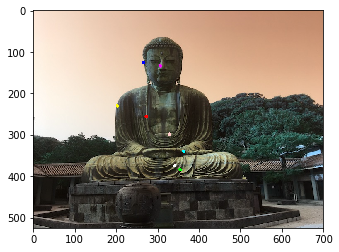

In [212]:
plt.imshow(img1, cmap = 'gray')

In [213]:
cv2.imwrite('matched_pts_sift1.png', img1)


True

In [214]:
cv2.imwrite('matched_pts_sift2.png', img2)

True

In [183]:
P1 = np.array([[1., 0., 0., 0.],
 [0., 1., 0., 0.],
 [0., 0., 1., 0.]])

P2 = np.array([[3.01460130e+00, -7.52205137e+00,  2.38997896e+02,  4.74218101e+02],
 [-5.98082486e+00,  1.49237917e+01, -4.74232117e+02,  2.39021519e+02],
 [-3.26601965e-02, -1.44449549e-02,  1.45527324e+01,  1.00000000e+00]])

In [186]:
X = give_scene_points(X1, X2, P1, P2)

In [216]:
names = ['Red', 'Yellow', 'Green', 'Indigo', 'Blue', 'Pink', 'Light Pink', 'White']
for i in range(len(X)):
    print('Depth of ' + str(names[i]) + ' feature point = ' + str(X[i][2]))

Depth of Red feature point = 0.14598639040243214
Depth of Yellow feature point = 0.06260831665669205
Depth of Green feature point = 0.05707716131989979
Depth of Indigo feature point = 0.09912299729474983
Depth of Blue feature point = 0.08419628073584379
Depth of Pink feature point = 0.13190778633051306
Depth of Light Pink feature point = 0.071129659119372
Depth of White feature point = 0.05874269703673224


In [188]:
X[1]

array([21.3144807 , 22.761364  ,  0.06260832])

In [189]:
X[2]

array([21.93350361, 20.31416612,  0.05707716])

In [194]:
x1 = np.matmul(P2, np.append(X[0],1))
x1 = x1/x1[2]
print(x1)

[139.21854922 326.00797724   1.        ]
